# Time-Series Analysis for Predicting Stock Performance using 10-K Financial Indicators
- Objective: Build a machine learning model that can predict whether a stock will perform well based only on financial indicators found in the 10-K filings data.

Questions to answer: 

- Is it possible to have a machine learning model learn the differences between stocks that perform well and those that don't, and then leverage this knowledge in order to predict which stock will be worth buying? 

- Is it possible to achieve this simply by looking at financial indicators found in the 10-K filings?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from scipy import stats

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 1. Data Preprocessing:

In [3]:
df_2014 = pd.read_csv('../fin_indi/2014_Financial_Data.csv')
df_2015 = pd.read_csv('../fin_indi/2015_Financial_Data.csv')
df_2016 = pd.read_csv('../fin_indi/2016_Financial_Data.csv')
df_2017 = pd.read_csv('../fin_indi/2017_Financial_Data.csv')
df_2018 = pd.read_csv('../fin_indi/2018_Financial_Data.csv')
df_2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [4]:
df_2014.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3208.000000,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3.808000e+03,3808.000000
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,0.036206,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,0.259765,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,0.000000,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.000000,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.044000,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,1.331484e+01,1.000000
max,1.824698e+12,42138.663900,1.537249e+12,4.621600e+11,1.153700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,3.605800,9328.200000,76.625000,5468.426400,1360.125000,729.576600,1542.611000,225.690000,2.418601e+06,1.000000


In [5]:
#Checking shape of each dataset
df_list = [df_2014, df_2015, df_2016, df_2017, df_2018]

for df in df_list:
    print(df.shape)

#Checking if features are the same across different years:
# Get column names of the first DataFrame
first_df_columns = df_list[0].columns

# Identify names of columns that are different in other DataFrames compared to the first DataFrame
diff_columns = []
for df in df_list[1:]:
    diff_columns.extend(list(df.columns.difference(first_df_columns)))

# Remove duplicate column names
different_columns = list(set(diff_columns))

if different_columns:
    print("Columns that are different compared to the first DataFrame:")
    print(different_columns)
else:
    print("All DataFrames have the same column headers.")


(3808, 225)
(4120, 225)
(4797, 225)
(4960, 225)
(4392, 225)
Columns that are different compared to the first DataFrame:
['2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]', '2016 PRICE VAR [%]']


In [6]:
all_cat_columns = []

#Formatting column names for efficiency 
for df in df_list:
    # Define a dictionary to map old names to new names
    rename_map = {'Unnamed: 0': 'stock', df.columns[-2]: 'next_yr_var_pct'}
    df.rename(columns=rename_map, inplace=True)
    
    #Find all non-numeric columns
    cat_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    all_cat_columns.extend(cat_columns)
df_2018.head()

,stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,next_yr_var_pct,Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [7]:
#All non-numeric columns in all DataFrames
all_cat_columns

['stock',
 'Sector',
 'stock',
 'Sector',
 'stock',
 'Sector',
 'stock',
 'Sector',
 'stock',
 'Sector']

In [8]:
#Checking if the values in the column "class" are correctly reflecting the optimal decision given the next year price_var
for df in df_list:
    incorrect_rows = df[(df['next_yr_var_pct'] < 0) & (df['Class'] != 0) |
                                   (df['next_yr_var_pct'] >= 0) & (df['Class'] != 1)]
    sum_incorrect = incorrect_rows.shape[0]
print(f"Total rows where values don't correspond correctly: {sum_incorrect}")

Total rows where values don't correspond correctly: 0


In [9]:
# Combine DataFrames from different years into a single DataFrame
df_combined = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018])

# Find unique stocks in each DataFrame
unique_stocks_per_df = [set(df['stock']) for df in [df_2014, df_2015, df_2016, df_2017, df_2018]]

# Find stocks that are present in some but not all DataFrames
stocks_in_some_df = set()
for i in range(len(unique_stocks_per_df)):
    for j in range(i+1, len(unique_stocks_per_df)):
        stocks_in_some_df.update(unique_stocks_per_df[i] ^ unique_stocks_per_df[j])

# Create a DataFrame with unique stocks and their counts
stocks_table = pd.DataFrame(list(stocks_in_some_df), columns=['Stock'])
stocks_table['Count'] = 0  # Initialize count column

# Count how many DataFrames each stock is in
for i, unique_stocks in enumerate(unique_stocks_per_df):
    stocks_table['Count'] += stocks_table['Stock'].isin(unique_stocks)

# Display the table
print(stocks_table)

      Stock  Count
0       JHI      2
1      CSTR      4
2      APPN      3
3       TSG      4
4       JRO      2
...     ...    ...
1249    IFN      2
1250  LMRKP      4
1251    NCA      2
1252   BRQS      3
1253    BFO      2

[1254 rows x 2 columns]


## 1.1 Missing Values

### Percentage of missing values in each feature:

In [10]:
years = list(range(2014, 2019))

# Calculate null value percentages for each year and concatenate them
null_percent_df = pd.DataFrame()
data_types_row = pd.DataFrame(df_2014.dtypes).T.rename(index={0: 'Data Types'})  # Get data types for the first DataFrame

for year, df in zip(years, df_list):
    null_counts = df.isnull().sum()
    total_records = len(df)
    null_percent = (null_counts / total_records) * 100
    null_percent_df = pd.concat([null_percent_df, null_percent.rename(f'{year}_null_percent')], axis=1)

# Transpose the DataFrame and add a row with data types at the beginning
null_percent_df = null_percent_df.T
null_percentage = pd.concat([data_types_row, null_percent_df])


null_percentage


,stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,next_yr_var_pct,Class
Data Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,float64,int64
2014_null_percent,0.0,1.155462,6.197479,1.943277,1.365546,3.571429,1.54937,1.654412,1.444328,1.654412,...,7.615546,7.615546,7.615546,9.690126,7.930672,6.486345,6.381303,0.0,0.0,0.0
2015_null_percent,0.0,1.626214,8.252427,4.684466,1.57767,6.432039,4.126214,4.223301,1.019417,4.247573,...,8.932039,8.956311,8.956311,11.116505,9.684466,8.519417,8.42233,0.0,0.0,0.0
2016_null_percent,0.0,10.193871,13.529289,13.341672,10.25641,14.863456,12.77882,12.924745,9.693558,12.924745,...,13.341672,15.113613,15.051074,18.198874,16.593704,16.093392,15.75985,0.0,0.0,0.0
2017_null_percent,0.0,10.584677,14.596774,13.689516,10.766129,15.866935,13.326613,13.326613,10.16129,13.649194,...,14.173387,16.350806,15.967742,18.004032,17.217742,17.137097,16.693548,0.0,0.0,0.0
2018_null_percent,0.0,1.047359,3.164845,4.212204,1.457195,5.396175,3.779599,4.189435,0.796903,4.189435,...,2.823315,5.282332,4.872495,6.17031,6.010929,5.897086,5.64663,0.0,0.0,0.0


### Features with significant amount of missing values:

In [11]:
# Filtering out columns with high null percentage
threshold = 40

null_columns = null_percent_df.columns[(null_percent_df.max() > threshold)]
null_percentage[null_columns]


,Net Debt,Other Assets,priceEarningsToGrowthRatio,ebtperEBIT,niperEBT,effectiveTaxRate,nIperEBT,eBTperEBIT,operatingCycle,cashConversionCycle,cashFlowToDebtRatio,cashFlowCoverageRatios,shortTermCoverageRatios,dividendPayoutRatio,Net Debt to EBITDA,10Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share)
Data Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2014_null_percent,33.534664,33.455882,34.033613,29.359244,32.641807,32.641807,32.641807,29.359244,99.973739,99.973739,41.911765,41.911765,51.365546,34.033613,37.394958,40.625,40.336134,40.625,41.622899,38.471639
2015_null_percent,34.757282,34.660194,39.975728,34.587379,37.791262,37.791262,37.791262,34.587379,99.951456,99.951456,22.791262,22.791262,46.723301,39.975728,38.737864,42.160194,41.893204,42.160194,42.864078,39.951456
2016_null_percent,40.546175,40.337711,46.153846,41.421722,43.548051,43.548051,43.548051,41.421722,99.895768,99.895768,28.934751,28.934751,50.385658,46.153846,44.090056,47.383782,47.112779,47.383782,47.654784,46.070461
2017_null_percent,39.334677,38.528226,45.645161,41.048387,43.245968,43.245968,43.245968,41.048387,99.899194,99.899194,29.596774,29.596774,50.806452,45.645161,44.375,46.814516,46.572581,46.814516,47.33871,45.846774
2018_null_percent,5.783242,4.735883,37.750455,32.809654,35.541894,35.541894,35.541894,32.809654,99.863388,99.863388,20.150273,20.150273,43.852459,37.750455,8.629326,37.636612,37.477231,37.636612,38.592896,36.020036


Feature Analysis:
1. {Other Assets}:
    - Indicates the value of a company's non-core assets.

    - Because these assets are recorded rarely, or are insignificant, the net balance in the OCA account is typically quite small.

2. {Price Earnings to Growth Ratio} & {Earnings Before Tax Ratios} & {Effective Tax Rate}
    - PEG ratio measures the stock's valuation considering both earnings growth and valuation multiples. EBT ratios and effective tax rate are essential in understanding a company's profitability and tax efficiency. 

    - High missing values in these can hinder accurate valuation and financial health analysis.


1. {Operating Cycle} & {Cash Conversion Cycle}:

    - Measure the time it takes for a company to convert its inventory into cash.

    - Dropping these features could lead to loss of valuable information about a company's operational efficiency. However, since about 99.9% of the data are missing in these columns, imputing or predicting values might not be reliable. Moreover, there are alternatives like working capital that can capture similar information, so we are going to drop these features. 


2. {Cash Flow to Debt Ratio} & {Cash Flow Coverage Ratios} & {Short-term Coverage Ratios} & {Net Debt} & {Net Debt to EBITDA}

    - Measure a company's ability to cover its debt obligations.

    - Dropping these features could significantly impact model's ability to assess a company's financial stability and liquidity.


3. {10Y Growth Rates}

    - Provide valuable insights into a company's long-term performance and growth potential.

    - Dropping these features could significantly limit model's ability to predict future performance.


Strategy:

- Mean, Median & Mode Imputation: 
    
    Impute using industry averages or historical data since these factors seem to be impactful to the analysis of a company's financial health. Depending on the characteristics of the distribution, we can choose to impute either mean or median to be robust against outliers.

- Hot-deck imputation/K-nearest Neighbors Imputation (Potential Extension)

    Replaces missing values with observed values from similar units, often identified based on characteristics or proximity. More complicated but captures sector differences as well as company size differences. For example, missing stock prices may be imputed using prices of similar stocks in the same industry. Predictive mean matching employs a trained predictive model to estimate missing values, considering characteristics of observations with missing data.


In [12]:
#Dropping features with significant null percentage (99% >)
for df_year in df_list:
    df_year.drop(columns=['operatingCycle', 'cashConversionCycle'], inplace=True)

## 1.2 Negative Values
- Verify whether negative values in financial datasets represent errors or feasible data points based on the context of the features.

- PCA is generally not sensitive to the scale or specific values of individual features; thus, the presence of negative values may not affect the performance or interpretation of PCA. PCA operates based on the covariance matrix or correlation matrix of features, and it's primarily concerned with variance and directionality rather than the actual values.

- Decision tree-based algorithms like Gradient Boosting or XGBoost are robust to negative values.
These algorithms handle features differently, and the decision trees' splitting mechanism does not inherently depend on the absolute values or the presence of negative values in features.

## 1.3 Imputation

#### 1.3.1 Deciding Imputation Measure:

We can first separate the data industry-wise and then employ industry specific imputation for each feature. Since it's not feasible to discern whether the missing values are indicative of absence of information or of non-applicability without external information, we assume the following strategy to retain valuable data while avoiding skewing the data too much. 
 
Choosing the Statistical Measure:

-Mean: Suitable for features with a roughly symmetric distribution and without significant outliers.

-Median: Robust against outliers, suitable for skewed distributions or features with outliers.

-Mode: Applicable for categorical variables or discrete values.

We begin with this simple imputation strategy, but we will also use more advanced techniques like hot-deck imputation, Multiple Imputation by Chained Equations or IterativeImputer potentially.

#### 1.3.2 Justification:
Improved Model Performance: Boosted decision tree models, like Gradient Boosting or XGBoost, can effectively handle missing values internally. However, imputing missing values might enhance the model's ability to capture the underlying patterns and relationships in the data, leading to potentially better model performance.

Reduced Bias: By imputing missing values using appropriate statistical measures or domain-specific knowledge, you minimize potential biases that might arise due to removing incomplete observations entirely.

Compatibility with Algorithms: Many machine learning algorithms, including boosted decision trees, require complete datasets for training. Imputation ensures the data is in a suitable format for these algorithms, enabling their effective utilization.

Imputation before handling outliers: 
High Missing Data Proportion:

Scenario: If a substantial portion of the dataset contains missing values (e.g., > 20-30%), imputing missing values before outlier handling might be preferable.
Reasoning: Imputing missing values first ensures the data remains complete for subsequent analysis. Outliers could significantly impact the statistical properties used for imputation, especially when imputation methods rely on statistical measures like mean or variance.

Limitations:

- Distortion of original variance
- Distortion of covariance with remaining variables within the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations (since the imputed values do not differ from the mean or from each other). Therefore leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. This is because we may be destroying intrinsic correlations since the mean/median that now replace NA will not preserve the relation with the remaining variables.

#### 1.3.3 Mean, Median & Mode Imputation:

In [13]:
# Create a list of imputed copies to retain original dataframes
imputed_df_dict = {}

skew_threshold = 1.5  # Set a new skewness threshold (tunable)

for idx, df_year in enumerate(df_list):
    print(f"\nDataframe Year: {2014 + idx}") #Display the year being processed
    df_copy = df_year.copy()
    
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            #Impute with mode for categorical data
            df_copy[col].fillna(df_copy.dropna()[col].mode())
        else: 
            skewness = df_copy[col].skew()
            if abs(skewness) > skew_threshold:
                # Impute with median for highly skewed distributions excluding NaN
                median = df_copy[col].median(skipna=True)
                df_copy[col].fillna(median, inplace=True)
            else:
                #Impute with mean for less skewed distributions excluding NaN
                mean = df_copy[col].mean(skipna=True)
                df_copy[col].fillna(mean, inplace=True)
    imputed_df_dict["imputed_df_" + str(2014 + idx)] = df_copy
    


Dataframe Year: 2014

Dataframe Year: 2015



Dataframe Year: 2016

Dataframe Year: 2017

Dataframe Year: 2018


In [14]:
imputed_df_dict.get("imputed_df_2015")

,stock,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,next_yr_var_pct,Class
0,PG,7.074900e+10,-0.04910,3.705600e+10,3.369300e+10,0.000000e+00,2.061600e+10,2.264400e+10,1.104900e+10,6.260000e+08,...,-0.2847,-0.2634,-0.1024,-0.10130,-0.1432,0.0000,-0.0394,Consumer Defensive,10.809451,1
1,VIPS,6.193685e+09,0.65870,4.669038e+09,1.524648e+09,1.658481e+08,5.223879e+08,1.205660e+09,3.189877e+08,1.321245e+07,...,28.6759,0.2144,0.1279,0.29460,0.0281,0.5309,0.5179,Consumer Defensive,-21.637010,0
2,KR,1.084650e+11,0.10260,8.551200e+10,2.295300e+10,0.000000e+00,1.716100e+10,1.981600e+10,3.137000e+09,4.880000e+08,...,0.1344,0.0065,0.0415,0.05350,0.0254,0.0000,0.1293,Consumer Defensive,-15.036503,0
3,RAD,2.652838e+10,0.03930,1.895164e+10,7.576732e+09,0.000000e+00,6.695642e+09,6.733788e+09,8.429440e+08,3.976120e+08,...,0.0336,-0.0371,0.2639,1.02660,-0.0344,0.0000,0.0205,Consumer Defensive,4.303799,1
4,GIS,1.763030e+10,-0.01560,1.168110e+10,5.949200e+09,0.000000e+00,3.328000e+09,3.871900e+09,2.077300e+09,3.154000e+08,...,-0.0653,-0.0119,-0.0568,-0.21180,0.0462,0.0000,-0.0421,Consumer Defensive,10.693172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,TSRI,5.740290e+07,0.15900,4.808743e+07,9.315468e+06,0.000000e+00,8.883003e+06,8.883003e+06,4.324650e+05,0.000000e+00,...,-0.0048,0.0000,0.0360,0.02200,0.0000,0.0000,0.0763,Technology,33.101842,1
4116,TZOO,1.239610e+08,-0.19110,1.814800e+07,1.058130e+08,1.221400e+07,8.977900e+07,1.019930e+08,3.820000e+06,0.000000e+00,...,0.0170,0.0000,-0.2650,-0.40110,4.6580,0.0784,-0.2021,Technology,13.801445,1
4117,USATP,5.800000e+07,0.03185,4.100000e+07,1.700000e+07,0.000000e+00,1.600000e+07,1.700000e+07,-0.000000e+00,0.000000e+00,...,0.0000,0.0000,0.0345,0.01025,0.0000,0.0000,0.0524,Technology,34.769228,1
4118,WSTG,3.820900e+08,0.12130,3.555170e+08,2.657300e+07,0.000000e+00,1.806300e+07,1.806300e+07,8.510000e+06,-3.680000e+05,...,-0.0306,0.3105,-0.0095,-0.01730,0.0000,0.0000,0.0939,Technology,6.050663,1


#### 1.3.4 Validation:

In [15]:
for key, df in imputed_df_dict.items():
    missing_vals = df.isnull()
    if missing_vals.any().any():
        print("There are still missing values in " + key)
    else:
        print("No missing values in " + key)

No missing values in imputed_df_2014
No missing values in imputed_df_2015
No missing values in imputed_df_2016
No missing values in imputed_df_2017
No missing values in imputed_df_2018


In [16]:
# Calculate summary statistics for specific columns before and after modifications
original_stats = df_2014[['Revenue', 'R&D Expenses']].describe()
imputed_stats = imputed_df_dict['imputed_df_2014'][['Revenue', 'R&D Expenses']].describe()

# Compare summary statistics between original and modified DataFrames
print("Original Summary Statistics:")
print(original_stats)
print("\nUpdated Summary Statistics:")
print(imputed_stats)

Original Summary Statistics:
            Revenue  R&D Expenses
count  3.764000e+03  3.672000e+03
mean   5.879050e+09  9.401830e+07
std    3.901741e+10  6.408912e+08
min   -6.276160e+08 -1.500000e+05
25%    5.788880e+07  0.000000e+00
50%    4.349010e+08  0.000000e+00
75%    2.393625e+09  9.911000e+06
max    1.824698e+12  1.153700e+10

Updated Summary Statistics:
            Revenue  R&D Expenses
count  3.808000e+03  3.808000e+03
mean   5.816144e+09  9.066050e+07
std    3.879564e+10  6.295814e+08
min   -6.276160e+08 -1.500000e+05
25%    5.905700e+07  0.000000e+00
50%    4.349010e+08  0.000000e+00
75%    2.360084e+09  8.710250e+06
max    1.824698e+12  1.153700e+10


## 1.4 Outliers:
- Financial markets, especially stock prices, can be volatile and exhibit extreme fluctuations. Extreme values might not always be indicative of errors but rather reflect genuine market movements.Here we will use the z-scores method which measures the number of standard deviations a data point is away from the mean. A high Z-score indicates a potential outlier.
z-scores are sensitive to the scale of the data. Features with larger values will naturally have higher Z-scores, even if they are not truly extreme.Standardize or normalize your data before calculating Z-scores to account for different scales. This ensures that outliers are identified based on relative deviation from the mean, regardless of the original units.

- Boosted decision trees are relatively robust to outliers, but here we will pre-process the outliers nonetheless because it signficiantly impacts calculations for PCA. 

In [17]:
# Selecting the numeric columns
numeric_cols = df_2014.select_dtypes(include=np.number).columns

# Calculate Z-scores for all numeric columns directly
z_scores_all = df_2014[numeric_cols].apply(lambda x: np.abs(stats.zscore(x)))

# Define threshold for Z-score
threshold = 3

# Find potential outliers using boolean indexing
outliers_dict = {col: df_2014.loc[z_scores_all[col] > threshold, col] for col in z_scores_all.columns}

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Potential outliers for '{col}':")
        print(outliers)

Potential outliers for 'next_yr_var_pct':
794     1.732000e+05
2068    2.418601e+06
2934    1.443588e+05
3308    6.955667e+05
Name: next_yr_var_pct, dtype: float64


Here we find some potential outliers that are at least 3 standard deviations from the mean. We can compare their performance with the rest of the stocks to visualize the magnitude of the deviation and identify any patterns or trends. 

- Industry Research: Conduct research on the specific industry or sector these outlier stocks belong to. Understand if such extreme variations are common within this sector.
- Historical Analysis: Analyze the historical performance of these stocks and indicators to see if such fluctuations occurred previously.
- Correlation Analysis: Check the correlation between the next year VAR (Value at Risk) and other financial indicators. Unusual correlations or lack thereof might provide insights into anomalies.

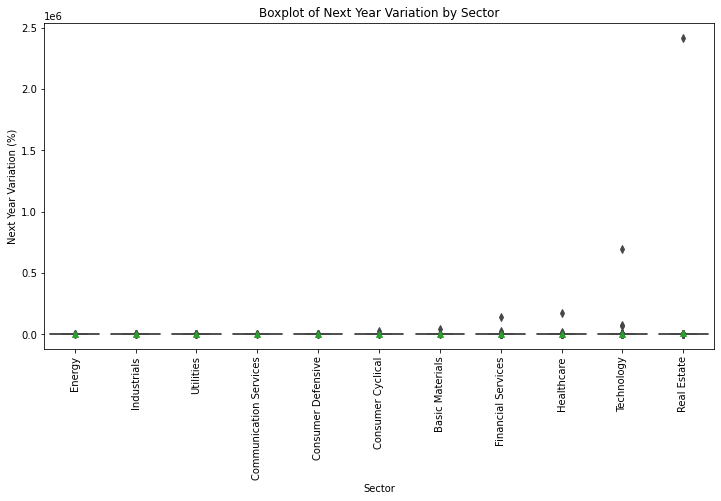

In [42]:
# Group by sector and calculate mean next_yr_var_pct within each sector
sector_mean = df_2014.groupby('Sector')['next_yr_var_pct'].mean().reset_index()

# Plot boxplot of mean next_yr_var_pct for each sector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='next_yr_var_pct', data=df_2014, showmeans=True, order=sector_mean.sort_values('next_yr_var_pct')['Sector'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Sector')
plt.ylabel('Next Year Variation (%)')
plt.title('Boxplot of Next Year Variation by Sector')
plt.show()

# 1.5 Principal Component Analysis (Potential Extension)
-for dimension reduction

-Decision tree-based models, including XGBoost, inherently handle correlated features well by making splits based on individual features at different nodes. They can naturally capture complex interactions and nonlinearities present in the data without explicitly requiring dimensionality reduction techniques like PCA.

-PCA assumes linear relationships between variables and might not effectively capture non-linear relationships present in the data. As a result, applying PCA before using XGBoost might discard useful information for the model to learn complex patterns.

-PCA transforms the original features into linearly uncorrelated components. While this reduces dimensionality, it often leads to a loss of interpretability as the principal components might not be directly relatable to the original features, making it challenging to explain the model's predictions.

In [19]:
#Separate data into numerical and categorical
numerical_data = imputed_df_dict.get("imputed_df_2014").select_dtypes(include='number')
categorical_data = imputed_df_dict.get("imputed_df_2014").select_dtypes(exclude='number')

#Standardize the numerical data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

#encode categorical data into binary dummy variables
encoder = OneHotEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data).toarray()

#Combine two dataframes
processed_data = np.concatenate((scaled_numerical_data, encoded_categorical_data), axis=1)

#Apply PCA
pca = PCA(n_components=225)
principal_components = pca.fit_transform(processed_data)


# 2. Model:

## 2.1 XGBoost 
-Robustness to Noisy Data:
Financial datasets can often contain noise and outliers. XGBoost has mechanisms (such as regularization) to handle noisy data and prevent overfitting, which is crucial for accurate predictions in finance.

-Speed and Efficiency:
XGBoost is known for its computational efficiency and scalability. Analyzing large financial datasets with many features can be done faster compared to other gradient boosting implementations.

-Handling Imbalanced Data:
Financial datasets might have imbalanced classes (e.g., in fraud detection). XGBoost allows adjusting class weights to handle such scenarios and improve model performance.

-Optimized Tree Pruning:
XGBoost uses a more regularized model formalization to control overfitting and can control the complexity of trees through hyperparameters, aiding in better generalization.

-Support for Missing Values:
XGBoost inherently handles missing values without requiring explicit preprocessing, which aligns well with datasets containing missing financial data.

XGBoost can also be used for time series forecasting, although it requires that the time series dataset be transformed into a supervised learning problem first. It also requires the use of a specialized technique for evaluating the model called walk-forward validation, as evaluating the model using k-fold cross validation would result in optimistically biased results.

### 2.1.1 XGBoost on Original Data

In [20]:
#Adding temporal information to each DataFrame
for idx, df_year in enumerate(df_list):
    #Add a "Year" column based on index
    df_year["Year"] = 2014 + idx

# Combine DataFrames from different years into a single DataFrame
df_combined = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018])


Financial data, like stock prices, often exhibits non-stationarity, meaning that statistical properties change over time. Creating lag features in time-series forecasting serves to capture the temporal dependencies and patterns in the data. Each lagged feature represents the historical values of the target variable (or other relevant features) at different time points in the past. The model can learn from the historical behavior and make predictions based on the temporal dynamics of the dataset.

In [21]:
#Define a function to create lag features for given DataFrame
def create_lag_features(df, target_column, lag=1):
    for i in range(1, lag + 1):
        df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
    return df

#Apply the function to df_combined
df_combined = create_lag_features(df_combined, target_column='Class', lag=3)

# Due to the creation of lag features, the first few rows will contain NaN values.
df_combined = df_combined.dropna()

In [22]:
# Finding the class distribution
class_distribution = df_combined['Class'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate the balance ratio
balance_ratio = class_distribution[1] / class_distribution[0]

# Print the balance ratio
print(f"\nBalance Ratio (Class 1 to Class 0): {balance_ratio:.2f}")

Class Distribution:
1    2098
0    1303
Name: Class, dtype: int64

Balance Ratio (Class 1 to Class 0): 1.61


In [23]:
#Split the data into training and testing set according to their temporal information
train_condition = (df_combined['Year'] >= 2014) & (df_combined['Year'] <= 2017)
test_condition = (df_combined['Year'] == 2018)

#Split training data into independent variables and target variable.
X_train = df_combined[train_condition].drop(['Class', 'next_yr_var_pct'], axis=1)
y_train = df_combined[train_condition]['Class']

#Split testing data
X_test = df_combined[test_condition].drop(['Class', 'next_yr_var_pct'], axis=1)
y_test = df_combined[test_condition]['Class']


# Print the shapes of the resulting sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (2608, 225)
Testing Set Shape: (793, 225)


In [24]:
categorical_columns = ['stock', 'Sector']

# Convert categorical columns to 'category' type for XGBoost processing
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


#### 2.1.1.a Hyperparameter Tuning Using GridSearch (Original Data)

In [25]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'n_estimators': [100, 150],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(enable_categorical=True)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = XGBClassifier(enable_categorical=True, **best_params)
final_model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.36


In [26]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Print classification report for test set
print("XGBoost Classification Report (Test) (Original Data):")
print(classification_report(y_test, y_pred))


XGBoost Classification Report (Test) (Original Data):
              precision    recall  f1-score   support

           0       0.23      0.86      0.36       169
           1       0.85      0.22      0.35       624

    accuracy                           0.36       793
   macro avg       0.54      0.54      0.36       793
weighted avg       0.72      0.36      0.36       793



### 2.1.2 XGBoost on Imputed Data

In [27]:
# Apply XGBoost on imputed data
for year, df_year in imputed_df_dict.items():
    # Add a "Year" column based on the year
    df_year["Year"] = int(year[-4:])

# Combine DataFrames from different years into a single DataFrame
imputed_df_combined = pd.concat(list(imputed_df_dict.values()), ignore_index=True)

# Filter data for training (2014-2017)
im_train_condition = (imputed_df_combined['Year'] >= 2014) & (imputed_df_combined['Year'] <= 2017)
X_train = imputed_df_combined[im_train_condition].drop(['Class', 'next_yr_var_pct'], axis=1)
y_train = imputed_df_combined[im_train_condition]['Class']

# Filter data for validation and testing (2018)
im_test_condition = (imputed_df_combined['Year'] == 2018)
X_test = imputed_df_combined[im_test_condition].drop(['Class', 'next_yr_var_pct'], axis=1)
y_test = imputed_df_combined[im_test_condition]['Class']


# Print the shapes of the resulting sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (17685, 222)
Testing Set Shape: (4392, 222)


In [28]:
categorical_columns = ['stock', 'Sector']

# Convert categorical columns to 'category' type for XGBoost processing
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [29]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'n_estimators': [100, 150],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(enable_categorical=True)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = XGBClassifier(enable_categorical=True, **best_params)
final_model.fit(X_train, y_train)

# Evaluate on the test set
im_test_accuracy = final_model.score(X_test, y_test)
print(f"Test Accuracy: {im_test_accuracy:.2f}")

Test Accuracy: 0.40


In [30]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Print classification report for test set
print("XGBoost Classification Report (Test) (Imputed Data):")
print(classification_report(y_test, y_pred))

XGBoost Classification Report (Test) (Imputed Data):
              precision    recall  f1-score   support

           0       0.33      0.89      0.48      1346
           1       0.80      0.19      0.30      3046

    accuracy                           0.40      4392
   macro avg       0.56      0.54      0.39      4392
weighted avg       0.65      0.40      0.36      4392



### 2.1.3 Visualization on XGBoost Classification Results 

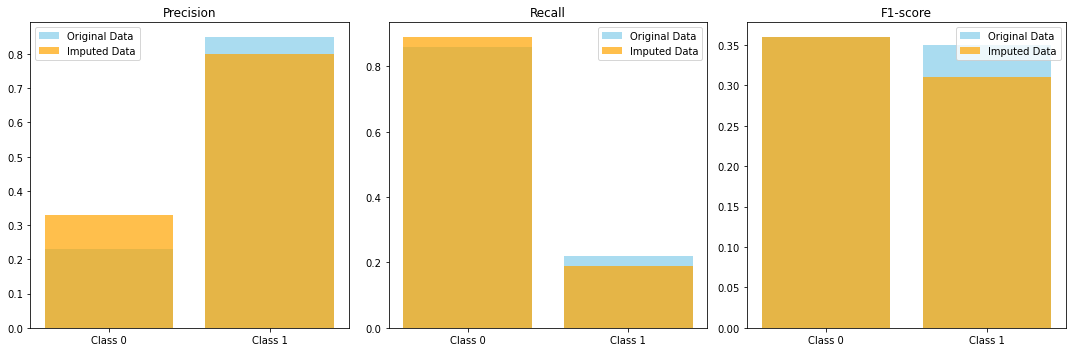

In [40]:
# Data for original data
precision_orig = [0.23, 0.85]  # Precision for class 0 and class 1
recall_orig = [0.86, 0.22]     # Recall for class 0 and class 1
f1_orig = [0.36, 0.35]         # F1-score for class 0 and class 1

# Data for imputed data
precision_imp = [0.33, 0.80]   # Precision for class 0 and class 1
recall_imp = [0.89, 0.19]      # Recall for class 0 and class 1
f1_imp = [0.36, 0.31]          # F1-score for class 0 and class 1

# Define classes
classes = ['Class 0', 'Class 1']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot precision
axs[0].bar(classes, precision_orig, color='skyblue', label='Original Data', alpha=0.7)
axs[0].bar(classes, precision_imp, color='orange', label='Imputed Data', alpha=0.7)
axs[0].set_title('Precision')
axs[0].legend()

# Plot recall
axs[1].bar(classes, recall_orig, color='skyblue', label='Original Data', alpha=0.7)
axs[1].bar(classes, recall_imp, color='orange', label='Imputed Data', alpha=0.7)
axs[1].set_title('Recall')
axs[1].legend()

# Plot F1-score
axs[2].bar(classes, f1_orig, color='skyblue', label='Original Data', alpha=0.7)
axs[2].bar(classes, f1_imp, color='orange', label='Imputed Data', alpha=0.7)
axs[2].set_title('F1-score')
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 2.2 AdaBoost (Extension)
- Perfect for binary classification, building weak learners that combine into a strong learner. 

Steps:

1. Initialize Sample Weights: Initially, each sample is assigned equal weights.

2. For Each Iteration (T):
    a. Train a Weak Learner: Train a weak learner (e.g., decision stump, which is a simple decision tree with one split) on the data, considering the sample weights.

    b. Compute Error: Calculate the weighted error of the weak learner on the training set.

    c. Calculate Learner Weight: Compute the weight of the weak learner based on its error.

    d. Update Sample Weights: Update the sample weights, assigning higher weights to misclassified samples.

    e. Normalize Weights: Normalize the sample weights to sum up to 1.

3. Combine Weak Learners: Finally, combine the predictions of all weak learners by weighted voting to create a strong classifier.

# 3. Interpreting Results:

- **Accuracy:** shows how often a classification ML model is correct overall. 
- **Precision:**  For each class, precision measures the proportion of true positive predictions among all instances predicted to belong to that class. It answers the question: "Of all the instances predicted as Class X, how many are actually Class X?"
- **Recall:** For each class, recall measures the proportion of true positive predictions among all instances that truly belong to that class. It answers the question: "Of all the instances that are actually Class X, how many were correctly predicted as Class X?"

<br/>

- **XGBoost classification model***
    - The model's accuracy is 0.36, which means it correctly predicted the class label for approximately 36% of the instances in the test set. The relatively low accuracy suggests that the model is not performing well on the test set. However, from section 2.1.1 we found the balance ratio of 1.61, indicating a high imbalance of classes where Class 1 has significantly more frequent occurrences than the other. In this case, the accuracy's usefulness as a standalone metric is undermined.


    - Precision is useful when the cost of a false positive is high, and here the cost is the loss of our invested capital. We want to avoid investing in false positives, which are stock that the model thinks are worthy but actually aren't. 
    
    - Moreover, we want our model to have high recall score so that it correctly identifies its target class. Class 0 (Stocks not worth buying) has a higher recall——(0.86 for original data) and (0.89 for imputed data), indicating that the model is better at identifying stocks that should be avoided. However, its precision is low——(0.23 for original) and (0.33 for imputed), meaning that many instances predicted as class 0 are actually class 1. Thus, the model seems to cast a broad net for Class 0. It identifies a lot of stocks as not worthy, but many of them might actually be worthy. 
    
    - A model with high precision on Class 1 is ideal because we want to be confident in identifying the worthy stocks for our investment, even if we miss out on some (or many) instances. The XGBoost model on both the original and imputed data yields a high precision score——(0.85 for original and 0.80 for imputed), which means it is often correct when it predicts that a stock is worthy. However, for Class 1, the recall is low——(0.22 for original) and (0.19 for imputed), meaning that the model misses a significant number of instances where a stock is actually worth buying. This is a limitation for investors who want to identify lucrative opportunities. It’s confident about the few positive instances it predicts but might miss a substantial number of actual positives.

    - In summary, the XGBoost model we trained above is very risk-averse and pessimistic. It cautiously predicts that many stocks will perform poorly in the next year, even though many might actually perform well, and when it does predict a worthy stock, it is often correct.  

# 4. Conclusion 

- The model appears to be risk-averse and cautious, as evidenced by its broad identification of stocks as not worth buying (Class 0). While this approach may minimize the risk of investing in poor-performing stocks, it may also lead to missed opportunities for lucrative investments. The model's performance, particularly in terms of recall for Class 1, suggests room for improvement. Future iterations of the model could focus on enhancing its ability to identify worthy stocks while maintaining a high level of precision.

- Incorporating additional features or refining existing features may also improve the model's predictive power. Exploring alternative machine learning algorithms and ensemble methods could offer further insights into the complex relationship between financial indicators and stock performance.

- In conclusion, while the XGBoost model shows promise in predicting stock performance based on financial indicators, its current performance indicates the need for refinement and optimization. By addressing the identified limitations and leveraging advanced modeling techniques, future iterations of the model may provide more reliable predictions for investors seeking to identify worthy stocks for investment.